# BFS (Breadth-First Search) for Web Crawling

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException

options = Options()
options.headless = True
b = webdriver.Chrome(options=options)

In [2]:
url = "https://tyler.caraza-harter.com/cs320/f20/lectures/lec-17/practice1/1.html"
b.get(url)

In [3]:
from IPython.core.display import display, Image
from graphviz import Digraph

In [4]:
b.set_window_size(300, 200)

In [5]:
# take URL to visit
# return other URLs based on the links
# show a screenshot of the page
def visit_page(url):
    b.get(url)
    b.save_screenshot("screen.png")
    display(Image("screen.png"))
    
    links = b.find_elements_by_tag_name("a")
    return [link.get_attribute("href") for link in links]

def node_name(url):
    return url.split("/")[-1].split(".")[0]
    
node_name("https://tyler.caraza-harter.com/cs320/f20/lectures/lec-17/practice1/1.html")

'1'

In [6]:
from collections import deque

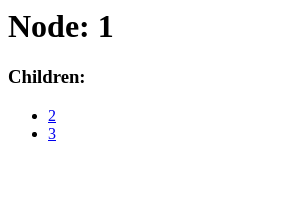

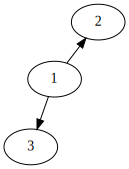

deque(['https://tyler.caraza-harter.com/cs320/f20/lectures/lec-17/practice1/2.html', 'https://tyler.caraza-harter.com/cs320/f20/lectures/lec-17/practice1/3.html'])


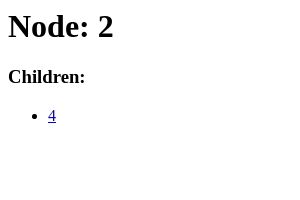

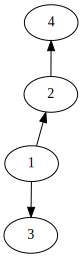

deque(['https://tyler.caraza-harter.com/cs320/f20/lectures/lec-17/practice1/3.html', 'https://tyler.caraza-harter.com/cs320/f20/lectures/lec-17/practice1/4.html'])


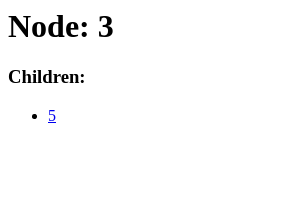

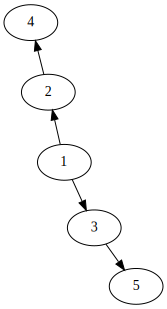

deque(['https://tyler.caraza-harter.com/cs320/f20/lectures/lec-17/practice1/4.html', 'https://tyler.caraza-harter.com/cs320/f20/lectures/lec-17/practice1/5.html'])


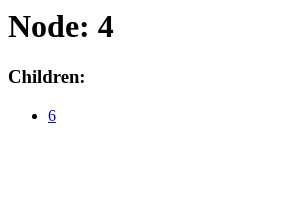

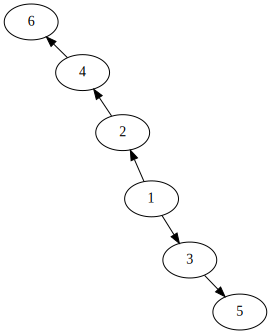

deque(['https://tyler.caraza-harter.com/cs320/f20/lectures/lec-17/practice1/5.html', 'https://tyler.caraza-harter.com/cs320/f20/lectures/lec-17/practice1/6.html'])


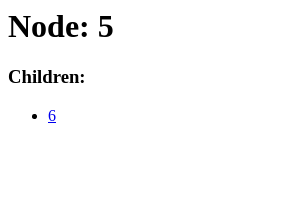

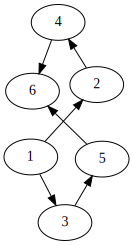

deque(['https://tyler.caraza-harter.com/cs320/f20/lectures/lec-17/practice1/6.html'])


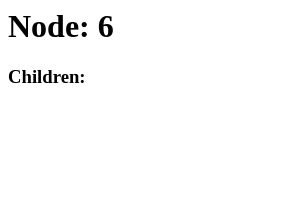

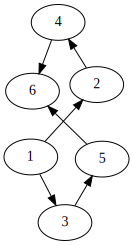

deque([])


In [7]:
start_url = "https://tyler.caraza-harter.com/cs320/f20/lectures/lec-17/practice1/1.html"
todo = deque([start_url])
added = set(todo)

gv = Digraph(engine="neato") # _repr_svg_

def visit_next():
    # 1. do the first thing on the list
    url = todo.popleft()
    gv.node(node_name(url))

    children_urls = visit_page(url)
    
    # 2. add new things to the end of the list
    for child_url in children_urls:
        if not child_url in added:
            todo.append(child_url)
            added.add(child_url)
        gv.edge(node_name(url), node_name(child_url))
    display(gv)
    print(todo)

while len(todo) > 0:
    visit_next()